# <center> Домашняя работа
#### <center> ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА
##### <p align = "right"> Илья Маяковский </p>
###### <p align = "right"> mayakovsky.il@ya.ru </p>

## Постановка задачи
HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

В процессе анализа вы должны ответить на ключевые вопросы HR-агентства:

* Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
* Какие факторы влияют на зарплату у специалистов Data Scientist?
* Как соотносятся зарплаты Data Scientist и Data Engineer в различных компаниях?
* Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.

Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:

тесты для количественного признака:
* для одной выборки;
* для двух выборок;
* для нескольких выборок;
тест для категориальных признаков.


Данные содержат следующие столбцы:

|НАИМЕНОВАНИЕ СТОЛБЦА|ОПИСАНИЕ|
|-|-|
|work_year|Год, в котором была выплачена зарплата.|
|experience_level|Опыт работы на этой должности в течение года со следующими возможными значениями:<br> EN — Entry-level/Junior; <br>MI — Mid-level/Intermediate; <br>SE — Senior-level/Expert; <br>EX — Executive-level/Director.|
|employment_type|Тип трудоустройства для этой роли:<br>PT — неполный рабочий день;<br>FT — полный рабочий день;<br>CT — контракт;<br>FL — фриланс.|
|job_title|Роль, в которой соискатель работал в течение года.|
|salary|Общая выплаченная валовая сумма заработной платы.|
|salary_currency|Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.|
|salary_in_usd|Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).|
|employee_residence|Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.|
|remote_ratio|Общий объём работы, выполняемой удалённо. Возможные значения:<br>0 — удалённой работы нет (менее 20 %);<br>50 — частично удалённая работа;<br>100 — полностью удалённая работа (более 80 %).|
|company_location|Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.|
|company_size|Среднее количество людей, работавших в компании в течение года:<br>S — менее 50 сотрудников (небольшая компания);<br>M — от 50 до 250 сотрудников (средняя компания);<br>L — более 250 сотрудников (крупная компания).|

[Скачать данные](https://lms-cdn.skillfactory.ru/assets/courseware/v1/9e84f30c5bc84881a5e33262d5e32a8b/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/ds_salaries.zip)

## Загрузка данных

In [3]:
#!pip freeze > requirements.txt

In [4]:

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms
import category_encoders as ce

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# оставим это как было в примере:
sns.set_theme('notebook') 
sns.set_palette('Set2')

### 1. Загрузка и обработка данных (2 балла)



Студент корректно загрузил данные:

In [5]:
data = pd.read_csv('C:/Users/mayak/OneDrive/Desktop/Data Science/Repositories/Data/ds_salaries.csv', index_col=[0])
display(data.head(3))
display(data.tail(3))

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


Студент проверил датасет на наличие пропусков и дубликатов, а также на корректность типов данных столбцов.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [7]:
print('В датасете {} дубликатов'.format(data[data.duplicated()].shape[0]))
data.drop_duplicates(inplace=True)
print('Количество строк после удаления дубликатов составляет: {}'.format(data.shape[0]))

В датасете 42 дубликатов
Количество строк после удаления дубликатов составляет: 565


<style>
  p {
  font-family: Verdana, Arial, Helvetica, sans-serif; 
  font-size: 10pt; /* Размер шрифта в пунктах */ 
  }
</style>
<span style="color:green"><b>Вывод:</b></span> <br>
Визуально просмотрел соотношение Dtype реальным данным в датасете на основе вывода первых и последних строк, а также описания содержания датасета. Данные определены верно.

Также видим, что пропуски отсутствуют, датасет не такой большой, все видно визуально.

Количество дубликатов: 42 - от дубликатов избавились

Студент определил в данных неинформативные признаки, которые не будут участвовать в исследовании.

In [8]:
data.drop(['salary','salary_currency'],axis=1,inplace=True)

<style>
  p {
  font-family: Verdana, Arial, Helvetica, sans-serif; 
  font-size: 10pt; /* Размер шрифта в пунктах */ 
  }
</style>
<span style="color:green"><b>Вывод:</b></span> <br>
Убрали два признака это 'salary' и 'salary_currency' которые отвечают за размер зарплаты и её валюту, т.к. в датасете уже есть признак 'salary_in_usd' он более удобен т.е. приводит все зарплаты к единому виду.

Студент классифицировал все признаки на числовые и дискретные.

<style>
  p {
  font-family: Verdana, Arial, Helvetica, sans-serif; 
  font-size: 10pt; /* Размер шрифта в пунктах */ 
  }
</style>
<span style="color:green"><b>Вывод:</b></span> <br>
|НАИМЕНОВАНИЕ СТОЛБЦА|ТИП|КОЛ-ВО ПРИЗНАКОВ|
|-|-|-|
|work_year|числовой|х|
|experience_level|дискретный|4|
|employment_type|дискретный|4|
|job_title|дискретный|50|
|salary_in_usd|числовой|х|
|employee_residence|дискретный|57|
|remote_ratio|дискретный|3|
|company_location|дискретный|50|
|company_size|дискретный|3|

Студент нашёл основные статистические характеристики для каждого из признаков.

In [9]:
data.describe(include='all' )

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,565.000000,565,565,565,565.000000,565,565.000000,565,565
unique,NaN,4,4,50,NaN,57,NaN,50,3
top,NaN,SE,FT,Data Scientist,NaN,US,NaN,US,M
freq,NaN,243,546,130,NaN,295,NaN,318,290
mean,2021.364602,NaN,NaN,NaN,110610.343363,NaN,69.911504,NaN,NaN
std,0.698138,NaN,NaN,NaN,72280.702792,NaN,40.900666,NaN,NaN
min,2020.000000,NaN,NaN,NaN,2859.000000,NaN,0.000000,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,60757.000000,NaN,50.000000,NaN,NaN
50%,2021.000000,NaN,NaN,NaN,100000.000000,NaN,100.000000,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,150000.000000,NaN,100.000000,NaN,NaN


<style>
  p {
  font-family: Verdana, Arial, Helvetica, sans-serif; 
  font-size: 10pt; /* Размер шрифта в пунктах */ 
  }
</style>
<span style="color:green"><b>Вывод:</b></span> <br>
Метод describe вывел стат.характеристики для всех колонок

### 2. Разведывательный анализ данных (4 балла)





In [10]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {}".format(alpha))

Уровень значимости alpha = 0.05


**Расчеты произведенные в отношении должностей Data Scientist и Data Engineer будут произведены с учетом выделения этих профессий как отдельных, например от Principal Data Scientist и Big Data Engineer**

#### 2.1. Визуальный анализ данных (2 балла)

work_year - год получения данных и salary_in_usd помогут нам определить рост зарплаты в принципе, а также ответить на первый вопрос "Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?"

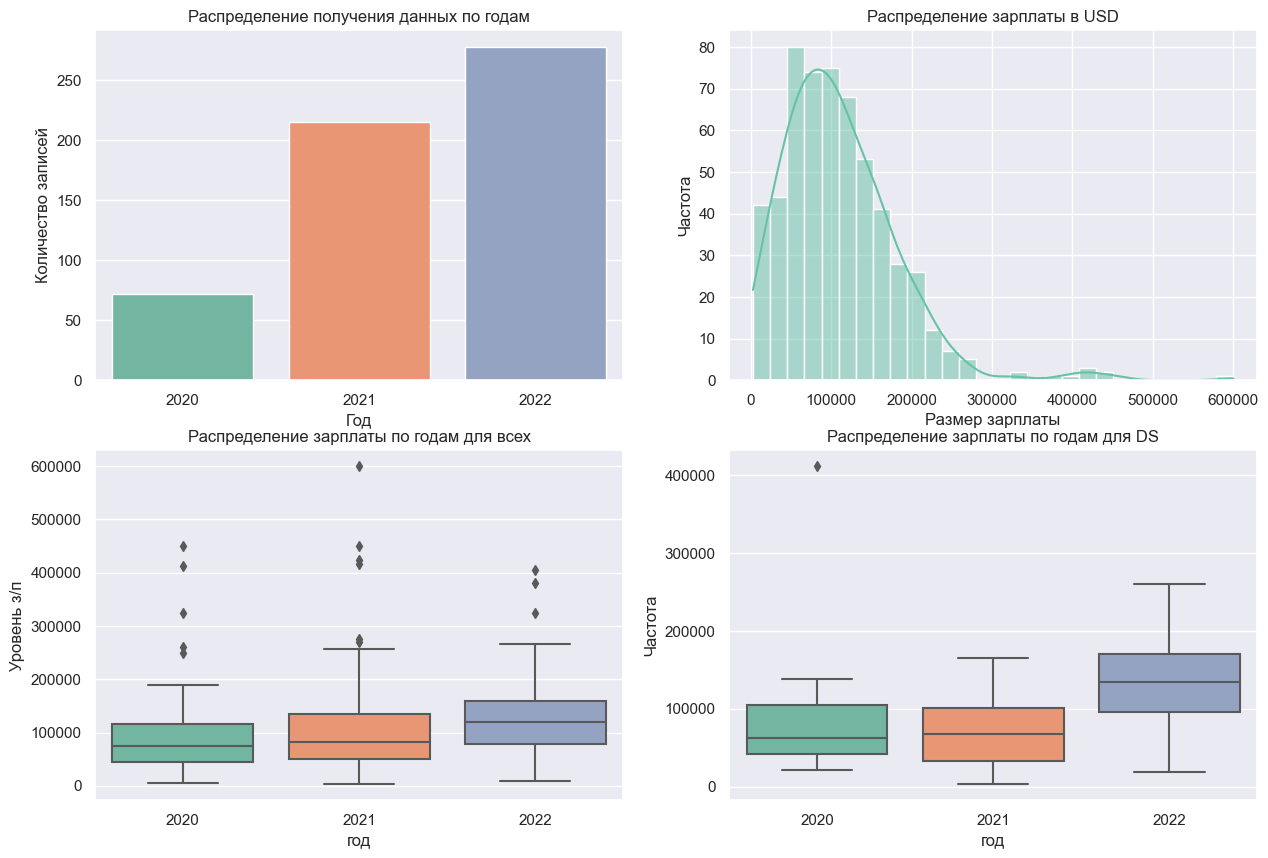

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0][0] = sns.countplot(data, x='work_year', ax=axes[0][0])
axes[0][0].set(xlabel='Год', ylabel='Количество записей')
axes[0][0].set_title('Распределение получения данных по годам')


axes[0][1] = sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0][1])
axes[0][1].set(xlabel='Размер зарплаты', ylabel='Частота')
axes[0][1].set_title('Распределение зарплаты в USD')

axes[1][0] = sns.boxplot(data, x='work_year', y='salary_in_usd', ax=axes[1][0])
axes[1][0].set(xlabel='год', ylabel='Уровень з/п')
axes[1][0].set_title('Распределение зарплаты по годам для всех')

axes[1][1] = sns.boxplot(data[data['job_title'] == 'Data Scientist'], x='work_year', y='salary_in_usd', ax=axes[1][1])
axes[1][1].set(xlabel='год', ylabel='Частота')
axes[1][1].set_title('Распределение зарплаты по годам для DS')

plt.show()

<style>
  p {
  font-family: Verdana, Arial, Helvetica, sans-serif; 
  font-size: 10pt; /* Размер шрифта в пунктах */ 
  }
</style>
<span style="color:green"><b>Вывод:</b></span> <br>
Из полученных графиков мы видим:
1. Привалирующее большинство полученных записей приходится на 2021 и 2022 год;
2. Распределение заработной платы в USD имеет выбросы, есть 2 вершины, следовательно распределение не является нормальный, также видим, что основное количество записей приходится на диапазон 50-100 тыс. долларов в год.
3. По распределению зарплаты по годам для всех специальностей видно, что уровень заработной платы из года в год растет, самый большой выброс приходится на 2021 год.
4. Если оценить Датасайнетистов, то можно сделать вывод о снижении уровня з-п в 2021 году.

experience_level - уровень квалификации

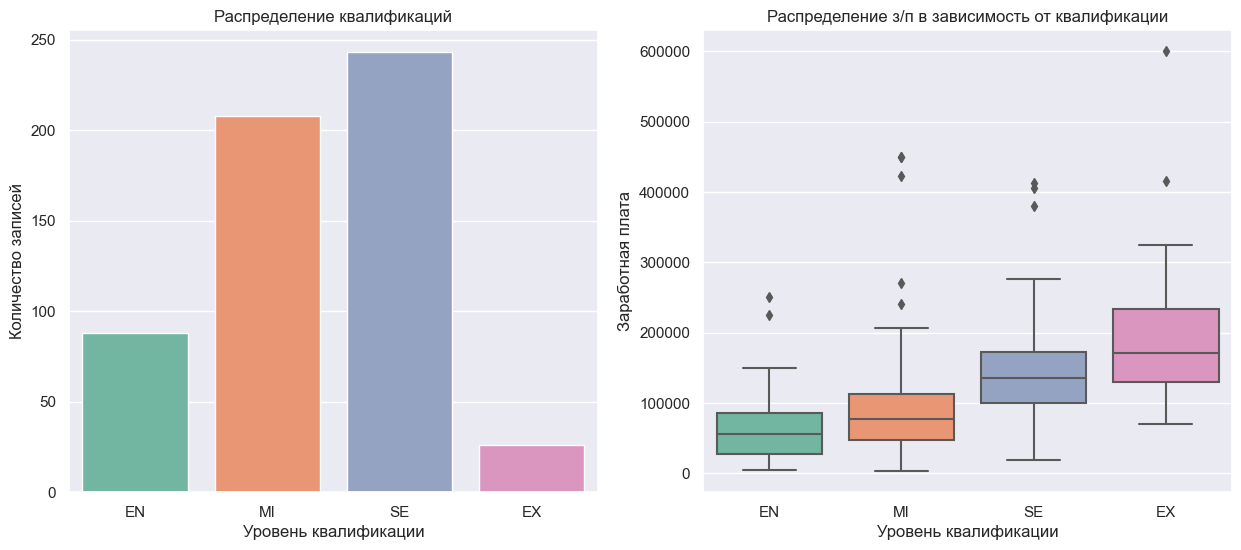

In [12]:
order = ['EN', 'MI', 'SE', 'EX']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0] = sns.countplot(data, x='experience_level', order = order, ax=axes[0])
axes[0].set(xlabel='Уровень квалификации', ylabel='Количество записей')
axes[0].set_title('Распределение квалификаций')


axes[1] = sns.boxplot(data, x='experience_level', y='salary_in_usd', order = order, ax=axes[1])
axes[1].set(xlabel='Уровень квалификации', ylabel='Заработная плата')
axes[1].set_title('Распределение з/п в зависимость от квалификации')

plt.show()

<style>
  p {
  font-family: Verdana, Arial, Helvetica, sans-serif; 
  font-size: 10pt; /* Размер шрифта в пунктах */ 
  }
</style>
<span style="color:green"><b>Вывод:</b></span> <br>
Из полученных графиков мы видим:
Что больше всего специальностей находится в грумме MI и SE (мидл и сеньер), очень мало уровня эксперта. При этом уровень заработной платы растет в зависимости от уровня квалификации.
Так медианный уровень заработной платы каждого последующего уровня примерно равен или выше верхнего квантиля предыдущего уровня.<br>
Уровень зарбплаты у экспертов - на самом высоком уровне.

job_title - Роль, в которой соискатель работал в течение года.

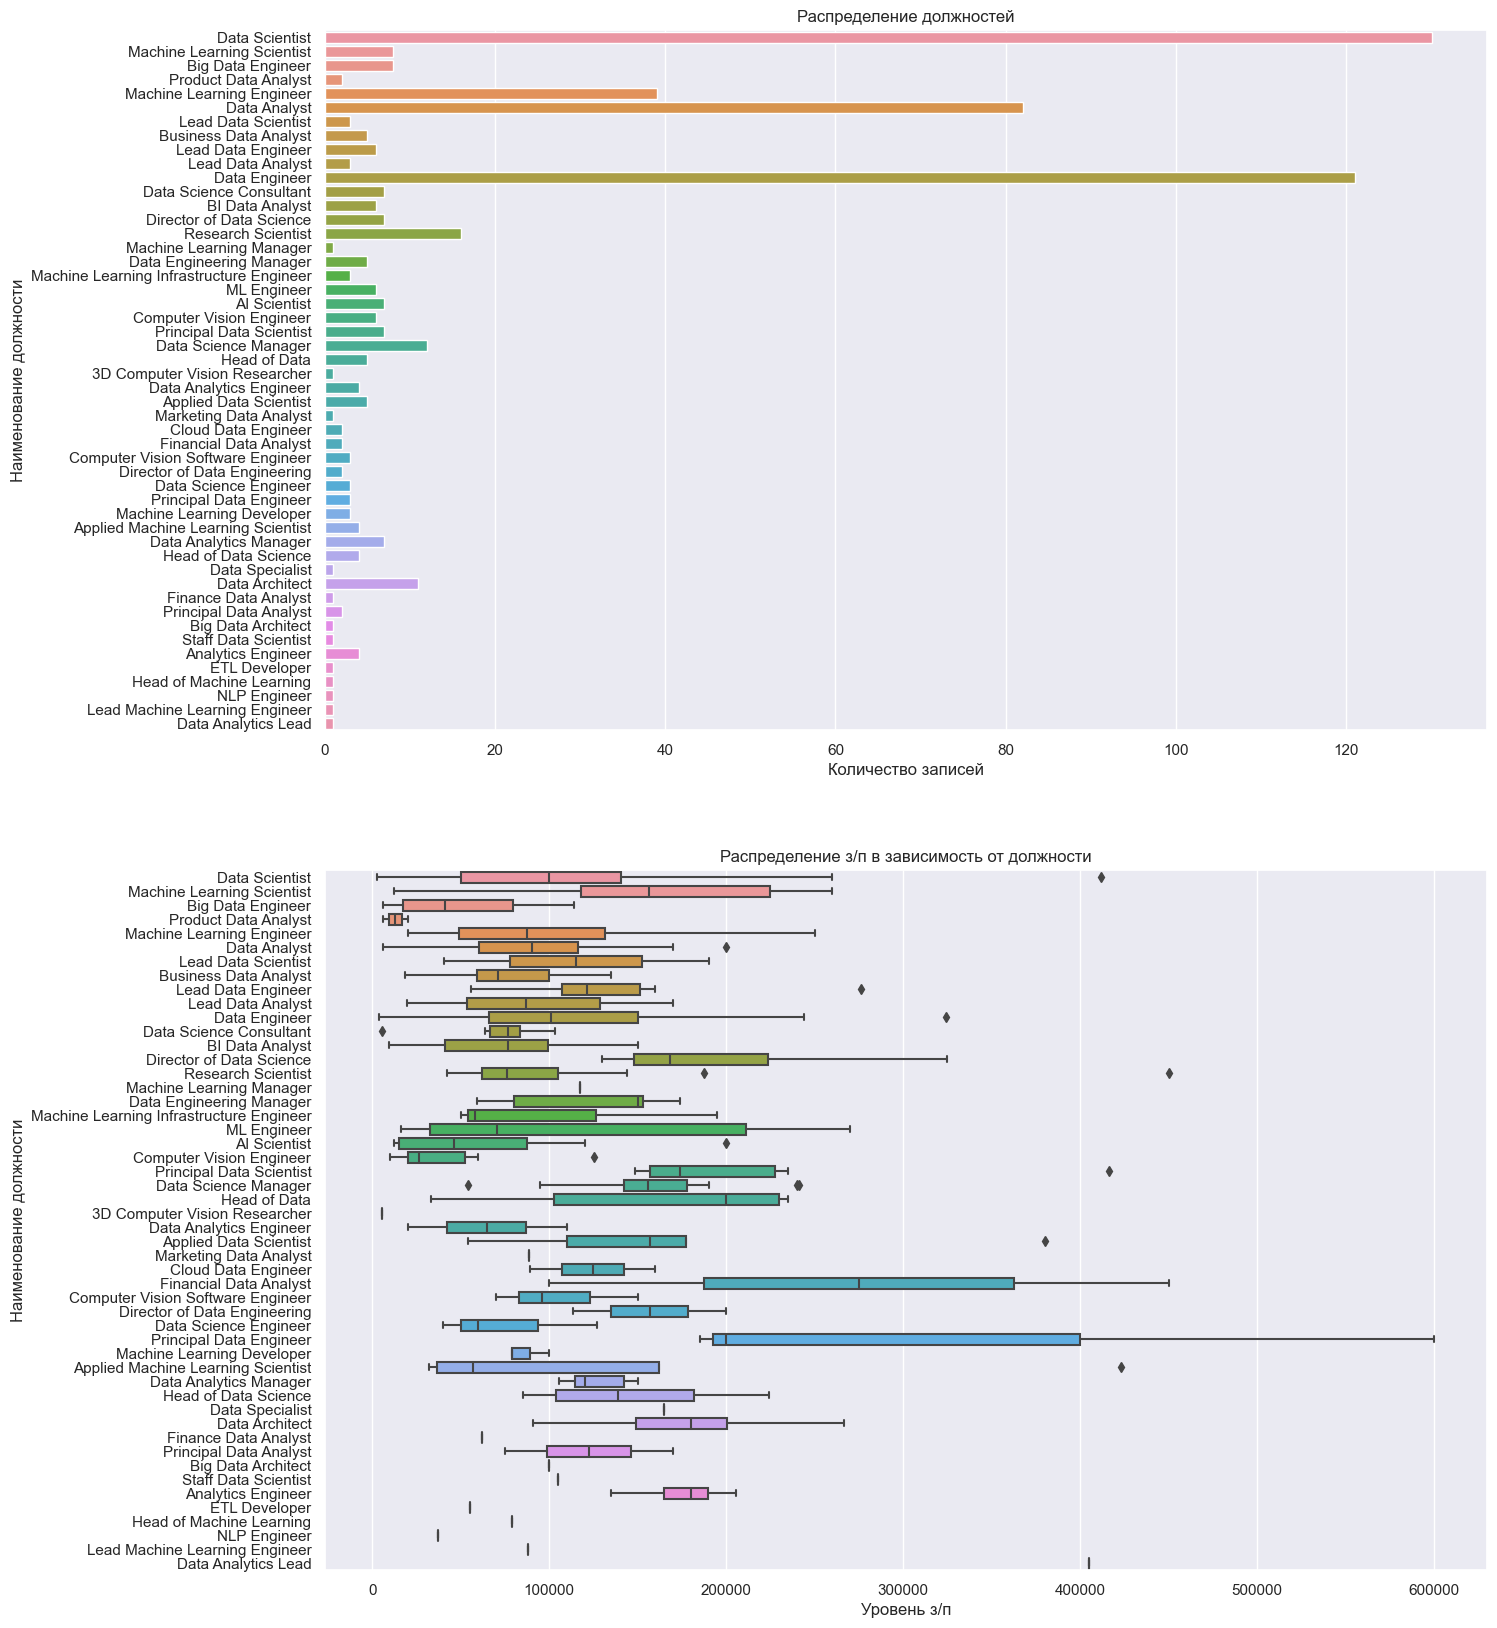

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(15, 20))

axes[0] = sns.countplot(data, y='job_title', ax=axes[0])
axes[0].set(xlabel='Количество записей', ylabel='Наименование должности')
axes[0].set_title('Распределение должностей')


axes[1] = sns.boxplot(data, y='job_title', x='salary_in_usd', ax=axes[1])
axes[1].set(xlabel='Уровень з/п', ylabel='Наименование должности')
axes[1].set_title('Распределение з/п в зависимость от должности')

plt.show()

<style>
  p {
  font-family: Verdana, Arial, Helvetica, sans-serif; 
  font-size: 10pt; /* Размер шрифта в пунктах */ 
  }
</style>
<span style="color:green"><b>Вывод:</b></span> <br>
Из построенного графика видно, что ТОП-5 профессий: Data Scientist, Data Engineer, Data Analyst, Maschine Learning Engineer, Research Scientist<br>
Уровень заработной платы у этих профессий находится примерно в одной плоскости по отношению к другим, самые высокооплачиваемые профессии это Principal Data Scientist и Financial Data Analyst

employee_residence - Основная страна проживания сотрудника

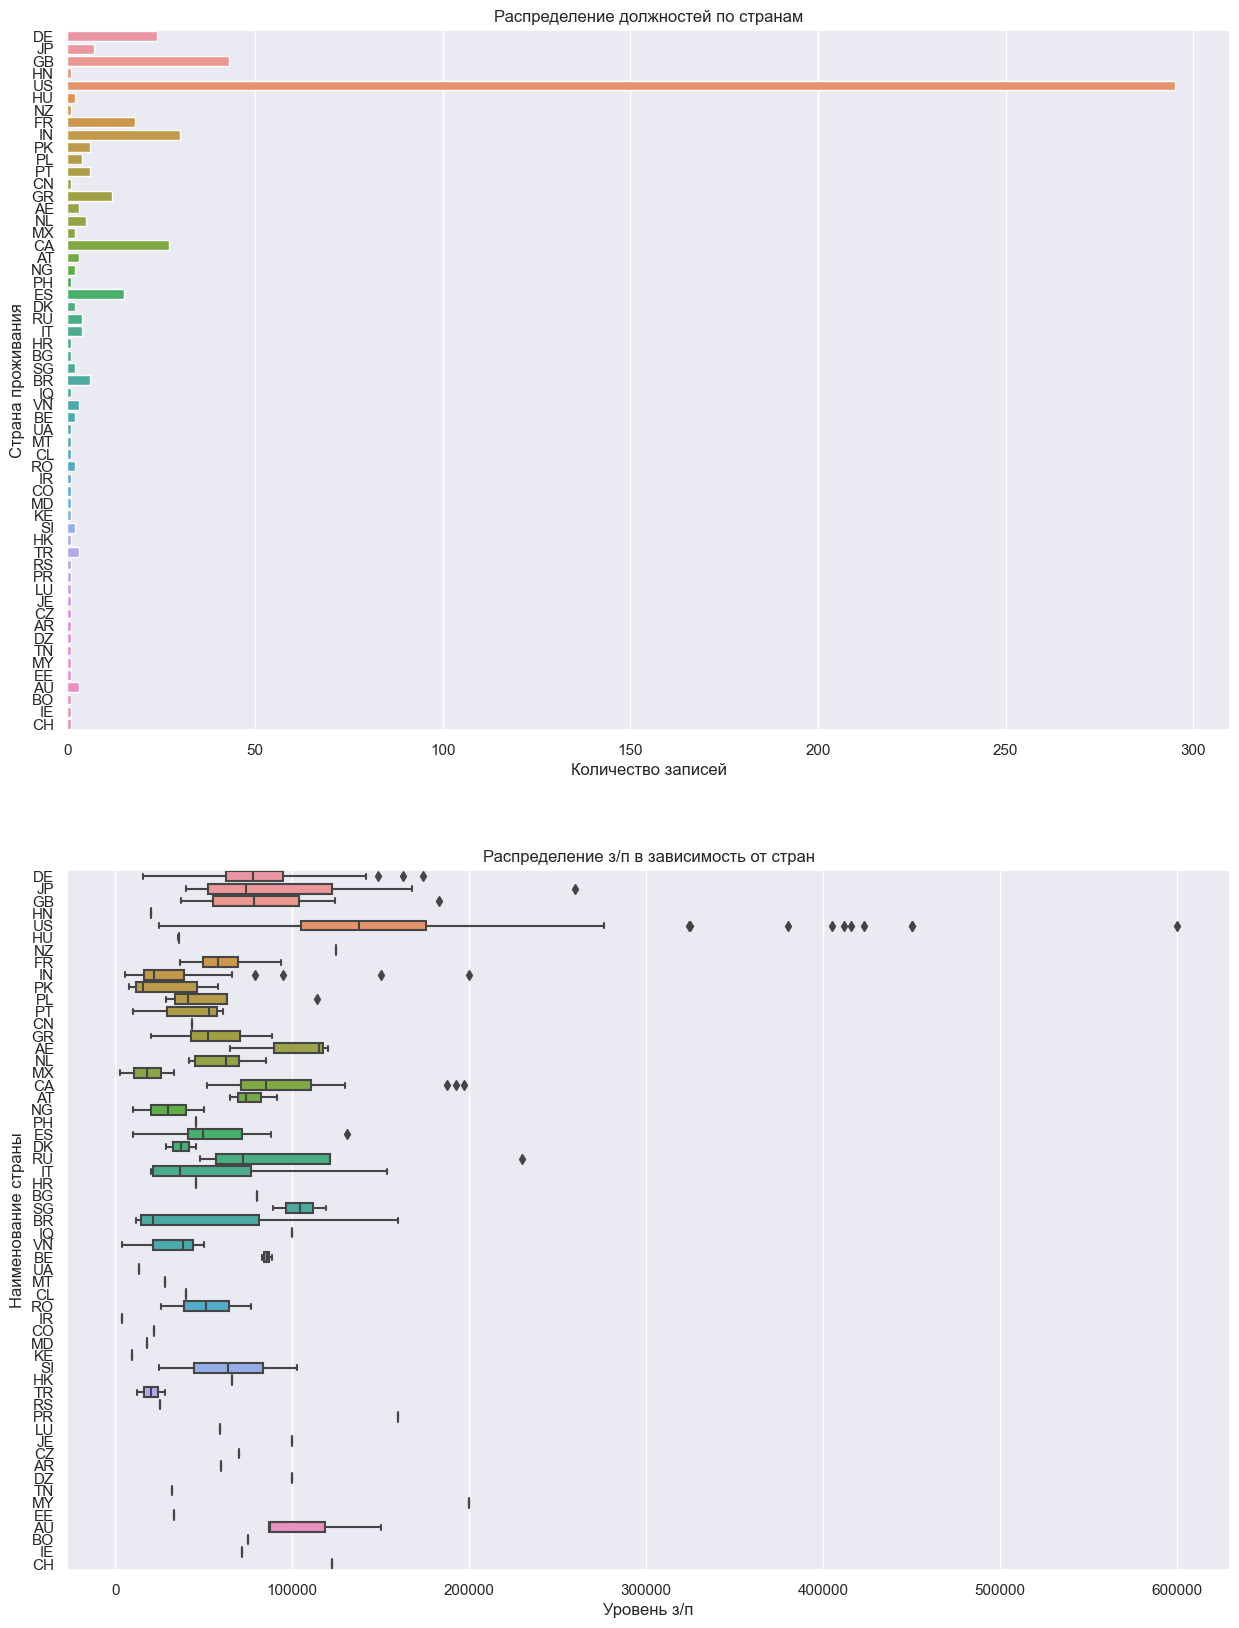

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(15, 20))

axes[0] = sns.countplot(data, y='employee_residence', ax=axes[0])
axes[0].set(xlabel='Количество записей', ylabel='Страна проживания')
axes[0].set_title('Распределение должностей по странам')


axes[1] = sns.boxplot(data, y='employee_residence', x='salary_in_usd', ax=axes[1])
axes[1].set(xlabel='Уровень з/п', ylabel='Наименование страны')
axes[1].set_title('Распределение з/п в зависимость от стран')

plt.show()

<style>
  p {
  font-family: Verdana, Arial, Helvetica, sans-serif; 
  font-size: 10pt; /* Размер шрифта в пунктах */ 
  }
</style>
<span style="color:green"><b>Вывод:</b></span> <br>
Из графика видно, что большинство сотрудников работают в Соединенных Штаты Америки, самый высокий уровенб заработной платы находится там же, возможно один признак коррелируется с другим.

remote_ratio - Общий объём работы, выполняемой удалённо

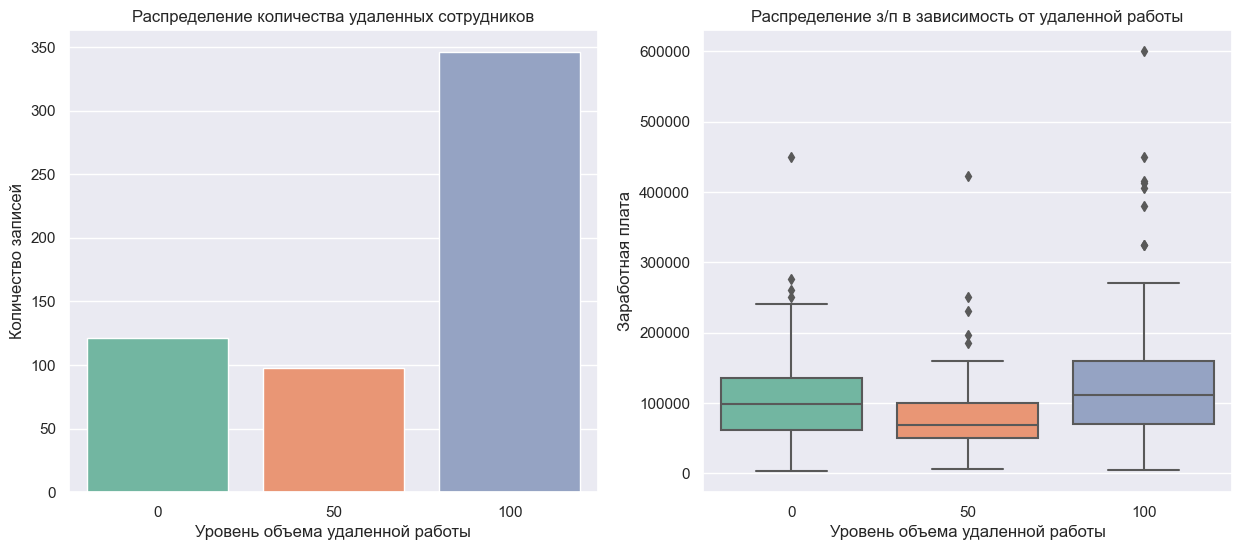

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0] = sns.countplot(data, x='remote_ratio', ax=axes[0])
axes[0].set(xlabel='Уровень объема удаленной работы', ylabel='Количество записей')
axes[0].set_title('Распределение количества удаленных сотрудников')


axes[1] = sns.boxplot(data, x='remote_ratio', y='salary_in_usd', ax=axes[1])
axes[1].set(xlabel='Уровень объема удаленной работы', ylabel='Заработная плата')
axes[1].set_title('Распределение з/п в зависимость от удаленной работы')

plt.show()

<style>
  p {
  font-family: Verdana, Arial, Helvetica, sans-serif; 
  font-size: 10pt; /* Размер шрифта в пунктах */ 
  }
</style>
<span style="color:green"><b>Вывод:</b></span> <br>
Из графика видно, что приобладает полностью удаленная работа, также заработная плата у "удаленщиков" выше остальных видов работы и примерно мопоставима у тех, кто работает в офисе

company_location - Страна офиса работодателя

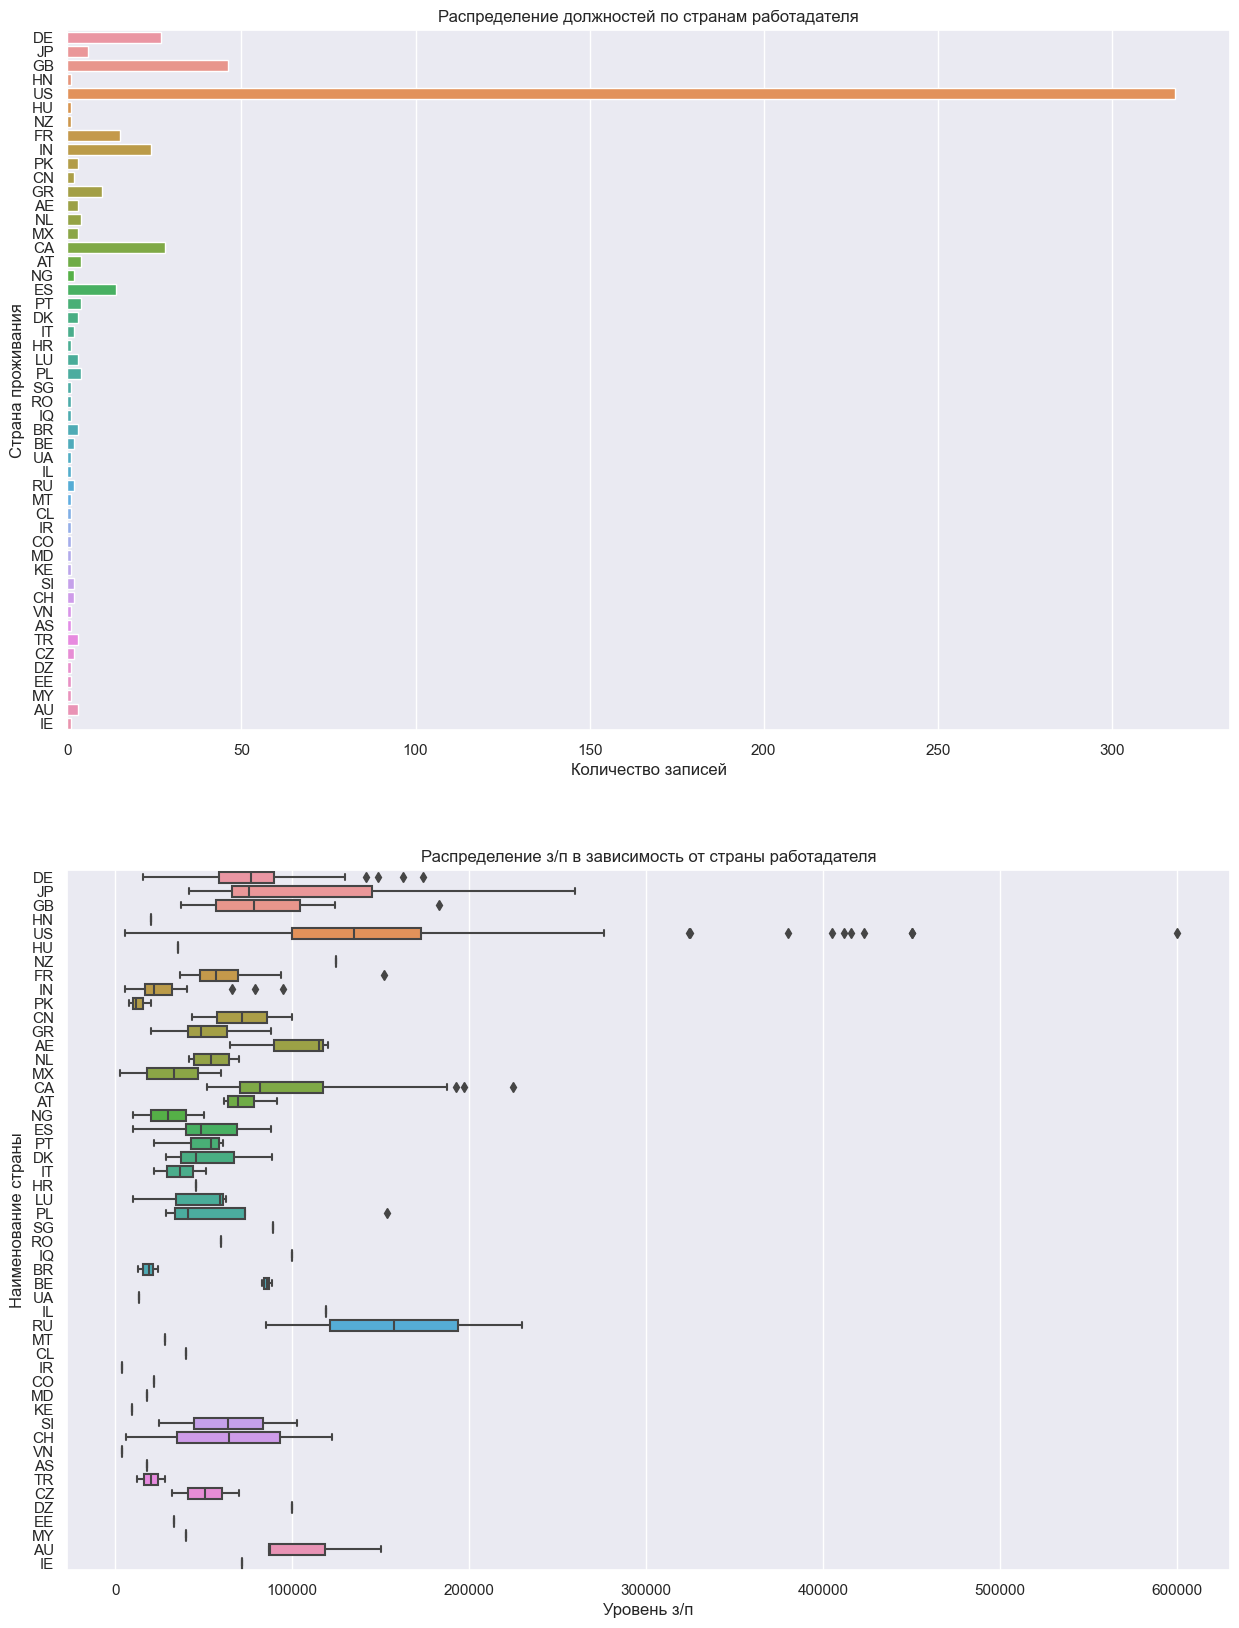

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(15, 20))

axes[0] = sns.countplot(data, y='company_location', ax=axes[0])
axes[0].set(xlabel='Количество записей', ylabel='Страна проживания')
axes[0].set_title('Распределение должностей по странам работадателя')


axes[1] = sns.boxplot(data, y='company_location', x='salary_in_usd', ax=axes[1])
axes[1].set(xlabel='Уровень з/п', ylabel='Наименование страны')
axes[1].set_title('Распределение з/п в зависимость от страны работадателя')

plt.show()

<style>
  p {
  font-family: Verdana, Arial, Helvetica, sans-serif; 
  font-size: 10pt; /* Размер шрифта в пунктах */ 
  }
</style>
<span style="color:green"><b>Вывод:</b></span> <br>
Среди работадателей в Соединенных Штаты Америки находятся на втором месте, самый высокий уровень в РФ, на третем месте Япония

company_size - Размер компании, зависит от среднего количества людей, работавших в компании в течение года

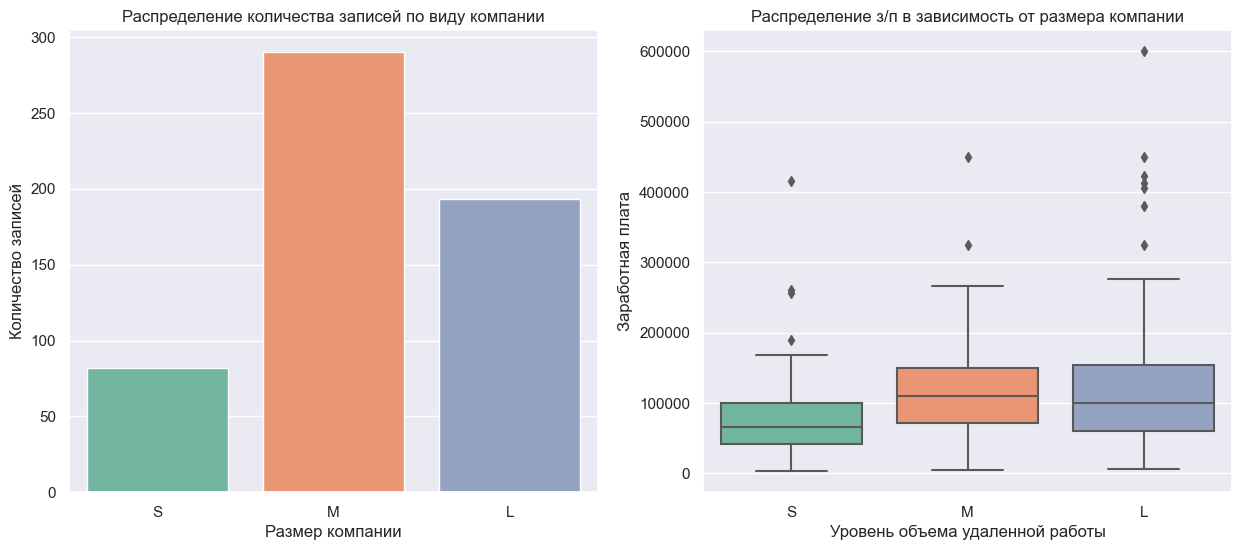

In [17]:
order_size = ['S', 'M', 'L']
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0] = sns.countplot(data, x='company_size', order = order_size, ax=axes[0])
axes[0].set(xlabel='Размер компании', ylabel='Количество записей')
axes[0].set_title('Распределение количества записей по виду компании')


axes[1] = sns.boxplot(data, x='company_size', y='salary_in_usd', order = order_size, ax=axes[1])
axes[1].set(xlabel='Уровень объема удаленной работы', ylabel='Заработная плата')
axes[1].set_title('Распределение з/п в зависимость от размера компании')

plt.show()

<style>
  p {
  font-family: Verdana, Arial, Helvetica, sans-serif; 
  font-size: 10pt; /* Размер шрифта в пунктах */ 
  }
</style>
<span style="color:green"><b>Вывод:</b></span> <br>
Из графика видно, что больше всего специалистов занятов с средних компаниям, также в заиметно, что медиана заработной платы в таких компаниях выше, чем в маленьких и больших

### Расчеты, для описания поставленных вопросов:

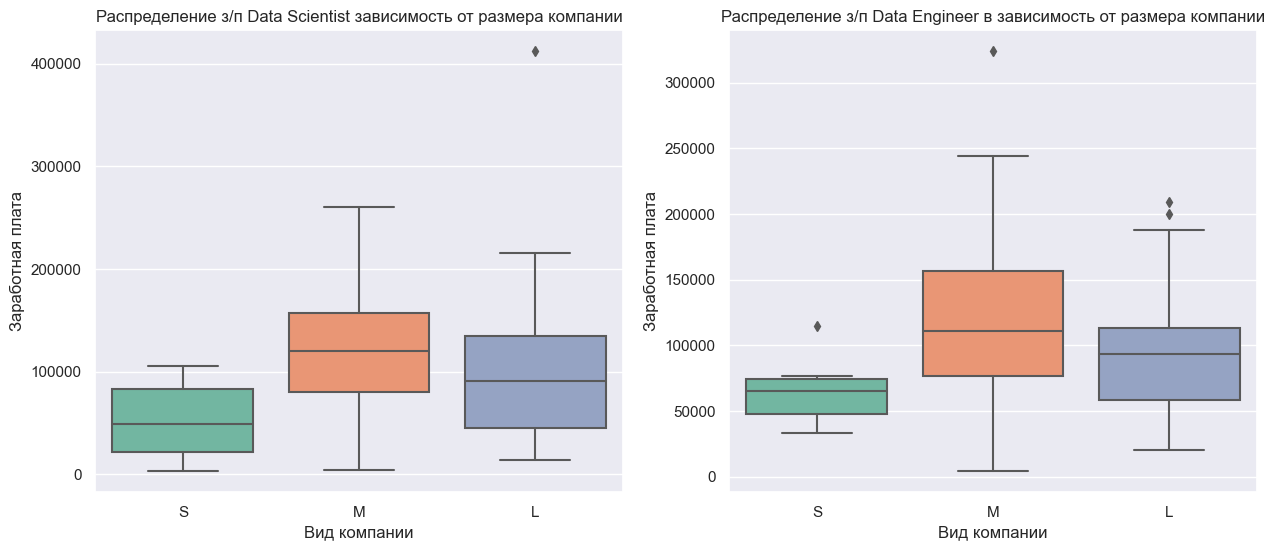

In [18]:
order_size = ['S', 'M', 'L']
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0] = sns.boxplot(data[data['job_title'] == 'Data Scientist'], x='company_size', y='salary_in_usd', order = order_size, ax=axes[0])
axes[0].set(xlabel='Вид компании', ylabel='Заработная плата')
axes[0].set_title('Распределение з/п Data Scientist зависимость от размера компании')

axes[1] = sns.boxplot(data[data['job_title'] == 'Data Engineer'], x='company_size', y='salary_in_usd', order = order_size, ax=axes[1])
axes[1].set(xlabel='Вид компании', ylabel='Заработная плата')
axes[1].set_title('Распределение з/п Data Engineer в зависимость от размера компании')

plt.show()

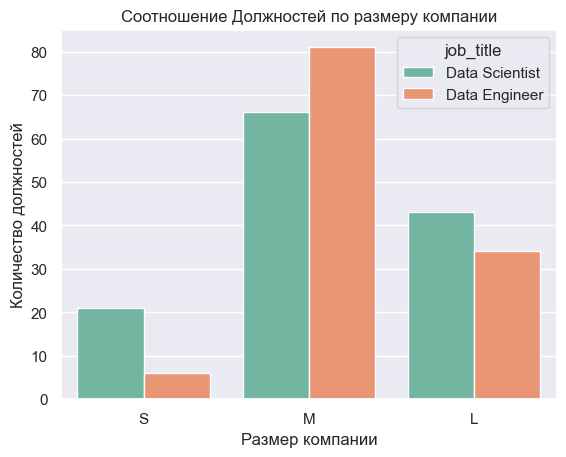

In [19]:
data_ds_de = data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')]



ax = sns.countplot(data=data_ds_de, x=data_ds_de['company_size'], hue='job_title', order = order_size)
ax.set(xlabel='Размер компании', ylabel='Количество должностей')
plt.title('Соотношение Должностей по размеру компании')
plt.show()

<style>
  p {
  font-family: Verdana, Arial, Helvetica, sans-serif; 
  font-size: 16pt; /* Размер шрифта в пунктах */ 
  }
</style>
<span style="color:green"><b>Вывод по разделу:</b></span> <br>
* Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist - да, наблюдается!
* Какие факторы влияют на зарплату у специалистов Data Scientist? - размер компании и страна трудоустройства влияет на уровень з/п
* Как соотносятся зарплаты Data Scientist и Data Engineer в различных компаниях? - заработная плата этих профессий зависит от размера компании, больше всего з/п в средних и больших компаниях. Однако заметно, что зарплата у Data Engineer выше, чем у Data Scientist
* Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании? - да, видно, что большинство должносткй в средних компания, также в здесь количество Data Engineer преобладает над Data Scientist. Меньше всего Data Engineer в матеньких компаниях

#### 2.2. Статистический анализ данных (2 балла)





In [20]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      
# функция для проверки на равенство диспесий
def decision_dispersion(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
    else:
        print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

#### Вопрос 1: Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [21]:
data_ds_20 = data[(data['job_title'] == 'Data Scientist') & (data['work_year']==2020)]
data_ds_21 = data[(data['job_title'] == 'Data Scientist') & (data['work_year']==2021)]
data_ds_22 = data[(data['job_title'] == 'Data Scientist') & (data['work_year']==2022)]

In [22]:
print('2020 год:')
decision_normality(stats.shapiro(data_ds_20['salary_in_usd'])[1])
print('\n2021 год:')
decision_normality(stats.shapiro(data_ds_21['salary_in_usd'])[1])
print('\n2022 год:')
decision_normality(stats.shapiro(data_ds_22['salary_in_usd'])[1])

2020 год:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

2021 год:
p-value = 0.107
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

2022 год:
p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


<style>
  p {
  font-family: Verdana, Arial, Helvetica, sans-serif; 
  font-size: 10pt; /* Размер шрифта в пунктах */ 
  }
</style>
<span style="color:green"><b>Вывод:</b></span> <br>
У нас есть выборка с распределением отличным от нормального<br>
Выбираем Критерий Краскела — Уоллиса (однофакторный дисперсионный анализ на рангах) является обобщением U-критерия Манна — Уитни на случай нескольких групп. Его используют, чтобы оценить различия медиан признака в двух и более независимых группах.

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер медианы зарплаты специалиста Data Science в 2020, 2021 и 2022 годах одинаковые:

$ H_0: m_1 =m_2 =m_3 $

*Альтернативная гипотеза*: размер медианы зарплаты специалиста Data Science в 2020, 2021 и 2022 годах отличаются:

$ H_1: m_1 \neq m_2 \neq m_3 $


In [23]:
_, p = stats.kruskal(data_ds_20['salary_in_usd'], data_ds_21['salary_in_usd'], data_ds_22['salary_in_usd'])
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


In [24]:
data_ds_20['salary_in_usd'].median() < data_ds_21['salary_in_usd'].median() < data_ds_22['salary_in_usd'].median() 

True

<style>
  p {
  font-family: Verdana, Arial, Helvetica, sans-serif; 
  font-size: 13pt; /* Размер шрифта в пунктах */ 
  }
</style>
<span style="color:green"><b>Вывод:</b></span> <br>
Ответ на вопрос "Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist":  - да, наблюдается!
Медианные значения растут из года в год, статистическая значимость гипотезы подтверждена

#### Вопрос 2: Какие факторы влияют на зарплату у специалистов Data Scientist?

Для удобства расчетов закодируем признаки

In [25]:
cols_df = [x for x in data.columns if data[x].dtype == 'object']

In [26]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(data[data['job_title'] == 'Data Scientist'][cols_df])
data_cod = pd.concat([data, data_bin], axis=1)

In [27]:
# т.к. у нас появились категориальные признаки, мы испольщуем корреляцию Кендала, она устойчива к неочищенным данным
data_corr = data_cod.corr(method = 'kendall')
print('Факторы и их коэффициенты корреляции, которые влияют на зарплату у специалистов Data Scientist: {}'.format(
    [(i, data_corr[i]['salary_in_usd']) for i in data_corr.index if abs(data_corr[i]['salary_in_usd']) > 0.5][1:]))

Факторы и их коэффициенты корреляции, которые влияют на зарплату у специалистов Data Scientist: [('employment_type', -0.9673225998807394), ('job_title', -1.0)]


In [28]:
data_corr['salary_in_usd']

work_year             0.175962
salary_in_usd         1.000000
remote_ratio         -0.354874
experience_level     -0.087179
employment_type      -0.967323
job_title            -1.000000
employee_residence   -0.198569
company_location     -0.376267
company_size         -0.249612
Name: salary_in_usd, dtype: float64

<style>
  p {
  font-family: Verdana, Arial, Helvetica, sans-serif; 
  font-size: 10pt; /* Размер шрифта в пунктах */ 
  }
</style>
<span style="color:green"><b>Вывод:</b></span> <br>
Судя по расчетам основные два фактора влияющие на уровень зарплаты DS являются тип трудоустройства и название должности, последняя не берется в расчет, т.к. только у датасайнетиста будет зарплата датасайнетиста
Также вилим влияние местонахождения компании и ее размер, а также удаленность работы, но это влияние незначительно

Проверим гипотезу которая возникла при визуальном анлизе "Размер компании влияет на уровень зараьотной платы специалистов Data Scientist":

*Нулевая гипотеза*: размер зарплаты специалистов Data Scientist в маленьких($μ_1$), средних($μ_2$) и больших($μ_3$) компаниях одинаков:

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза*: размер зарплаты специалистов Data Scientist в маленьких($μ_1$), средних($μ_2$) и больших($μ_3$) компаниях неодинаков.

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [29]:
data_ds_S = data[(data['job_title'] == 'Data Scientist') & (data['company_size']=='S')]
data_ds_M = data[(data['job_title'] == 'Data Scientist') & (data['company_size']=='M')]
data_ds_L = data[(data['job_title'] == 'Data Scientist') & (data['company_size']=='L')]

In [30]:
print('\nДля компании S:')
decision_normality(stats.shapiro(data_ds_S['salary_in_usd'])[1])
print('\nДля компании M:')
decision_normality(stats.shapiro(data_ds_M['salary_in_usd'])[1])
print('\nДля компании L:')
decision_normality(stats.shapiro(data_ds_L['salary_in_usd'])[1])


Для компании S:
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

Для компании M:
p-value = 0.897
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

Для компании L:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста, для этого ответим на следующие вопросы:
* Какой тип у признака “зарплата”? - Количественный
* Количество сравниваемых групп? - 3 группы
* Группы зависимы? - Нет
* Признак распределен по нормальному закону? - Нет 

Для проверки нашей гипотезы можем использовать Критерий Краскела-Уоллиса.

**Проведем тест**

In [31]:
_, p = stats.kruskal(data_ds_S['salary_in_usd'], data_ds_L['salary_in_usd'], data_ds_M['salary_in_usd'])
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.



<style>
  p {
  font-family: Verdana, Arial, Helvetica, sans-serif; 
  font-size: 10pt; /* Размер шрифта в пунктах */ 
  }
</style>
<span style="color:green"><b>Вывод:</b></span> <br>
Зарплата специалистов Data Scientist в маленьких, средних и больших компаниях различна

<style>
  p {
  font-family: Verdana, Arial, Helvetica, sans-serif; 
  font-size: 13pt; /* Размер шрифта в пунктах */ 
  }
</style>
<span style="color:green"><b>Вывод:</b></span> <br>
Ответ на вопрос "Какие факторы влияют на зарплату у специалистов Data Scientist?":
На заработную плату у специалистов Data Scientist влияют:
* Размер компании
* Страна расположения компании
* Тип занятости

#### Вопрос 3: Как соотносятся зарплаты Data Scientist и Data Engineer в различных компаниях?

In [32]:
# делаем выборки только для Data Engineer, т.к. для Data Scientist они подготовлены ранее

data_de_S = data[(data['job_title'] == 'Data Engineer') & (data['company_size']=='S')]
data_de_M = data[(data['job_title'] == 'Data Engineer') & (data['company_size']=='M')]
data_de_L = data[(data['job_title'] == 'Data Engineer') & (data['company_size']=='L')]

In [33]:
# проверка на нормальность

print('\nДля компании S:')
decision_normality(stats.shapiro(data_de_S['salary_in_usd'])[1])
print('\nДля компании M:')
decision_normality(stats.shapiro(data_de_M['salary_in_usd'])[1])
print('\nДля компании L:')
decision_normality(stats.shapiro(data_de_L['salary_in_usd'])[1])


Для компании S:
p-value = 0.606
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

Для компании M:
p-value = 0.085
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

Для компании L:
p-value = 0.109
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


In [34]:
# проверка равенство дисперсий только S и M компаний, т.к. у L компаний распределение для DS не является нормальным и точно будет использоваться непараметрический тест
print('\nДля компании S:')
result = stats.levene(data_ds_S['salary_in_usd'], data_de_S['salary_in_usd'])
decision_dispersion(result[1])
print('\nДля компании M:')
result = stats.levene(data_ds_M['salary_in_usd'], data_de_M['salary_in_usd'])
decision_dispersion(result[1])


Для компании S:
p-value = 0.348
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Для компании M:
p-value = 0.689
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.


**Выберем подходящий статистический тест для сравнения L компаний**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер заработной платы»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна — Уитни для сравнения распределений на основе рангов.

**Выберем подходящий статистический тест для сравнения S и M компаний**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер страховых выплат»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — ДА.
* Дисперсии одинаковы - Да

Чтобы проверить нашу гипотезу, можно использовать Двухвыборочный T-КРИТЕРИЙ.


**Проведём тест**

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер зарплаты специалиста Data Science ($μ_1$) меньше или равен размеру зарплаты специалиста Data Engineer ($μ_2$):

$$ H_0 : μ_1 \leq μ_2 $$

*Альтернативная гипотеза*: размер зарплаты специалиста Data Science ($μ_1$) больше размера зарплаты специалиста Data Engineer ($μ_2$):

$$ H_1 : μ_1 > μ_2 $$

In [35]:
print('\nДля компании L:')
_, p = stats.mannwhitneyu(data_ds_L['salary_in_usd'], data_de_L['salary_in_usd'], alternative='greater')
decision_hypothesis(p)
print('\nДля компании M:')
_, p = stats.ttest_ind(data_ds_M['salary_in_usd'], data_de_M['salary_in_usd'], alternative='greater', equal_var=True)
decision_hypothesis(p)
print('\nДля компании S:')
_, p = stats.ttest_ind(data_ds_S['salary_in_usd'], data_de_S['salary_in_usd'], alternative='greater', equal_var=True)
decision_hypothesis(p)



Для компании L:
p-value = 0.451
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

Для компании M:
p-value = 0.430
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

Для компании S:
p-value = 0.827
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


<style>
  p {
  font-family: Verdana, Arial, Helvetica, sans-serif; 
  font-size: 13pt; /* Размер шрифта в пунктах */ 
  }
</style>
<span style="color:green"><b>Вывод:</b></span> <br>
Ответ на вопрос "Как соотносятся зарплаты Data Scientist и Data Engineer в различных компаниях?": во всех видах компаний размер зарплаты специалиста Data Science меньше или равен размеру зарплаты специалиста Data Engineer.
т.е. нет оснований утверждать, что зарплата специалистов Data Scientist больше чем зарплата специалистов Data Engineer в каком-то виде компаний

#### Вопрос 4: Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

In [36]:
# у нас уже есть таблица для DS и DE, будем ее использовать:

table = pd.crosstab(data_ds_de['job_title'], data_ds_de['company_size'])
table
# строить тепловую карту не целесообразно, размер таблицы 2 на 2

company_size,L,M,S
job_title,,,
Data Engineer,34,81,6
Data Scientist,43,66,21



**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: признаки «Должность» и «Размер компании» независимы.

*Альтернативная гипотеза*: признаки «Должность» и «Размер компании» взаимосвязаны

**Выберем подходящий статистический тест**

Будем использовать Критерий хи-квадрат

**Проведем тест**

In [37]:
_, p, _, _ = stats.chi2_contingency(table)
decision_hypothesis(p)

p-value = 0.005
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


<style>
  p {
  font-family: Verdana, Arial, Helvetica, sans-serif; 
  font-size: 13pt; /* Размер шрифта в пунктах */ 
  }
</style>
<span style="color:green"><b>Вывод:</b></span> <br>
Ответ на вопрос "Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?": да, существует взаимосвязь между  размером компании и должностями DS и DE. 

####  Дополнительное исследование (2 балла)

### Вопрос: Является ли зарплата специалиста Data Science, проживающих в США выше средней зарплаты по всем странам?


**Сформулируем нулевую и альтернативные гипотезы**

Нулевая гипотеза ($H_0$): средний уровень зарплаты специалистов DataScience, проживающих в США ($μ_1$) ниже или равен среднему уровню зарплат по всем странам ($μ_2$).

$ H_0 : μ_1 <= μ_2$


Альтернативная гипотеза ($H_0$): средний уровень зарплаты специалистов DataScience, проживающих в США ($μ_1$) выше среднего уровня зарплат ппо всем странам ($μ_2$).

$ H_0 : μ_1 > μ_2$





**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Гипотезы теста Шапиро-Уилка:

Нулевая гипотеза ($H_0$): распределение данные является нормальным.

Альтернативная гипотеза ($H_1$): распределение данных отлично от нормального.


In [38]:
data_ds_all = data[data['job_title']=='Data Scientist']
data_ds_us = data[(data['job_title']=='Data Scientist') & (data['employee_residence']=='US')]


print('Для специалистов DataScience вообще:')
result = stats.shapiro(data_ds_all['salary_in_usd'])
decision_normality(result[1])

print('\nДля специалистов DataScience в США:')
result = stats.shapiro(data_ds_us['salary_in_usd'])
decision_normality(result[1])

Для специалистов DataScience вообще:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

Для специалистов DataScience в США:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна — Уитни

In [39]:
_, p = stats.mannwhitneyu(data_ds_us['salary_in_usd'], data_ds_all['salary_in_usd'], alternative='greater')
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


<style>
  p {
  font-family: Verdana, Arial, Helvetica, sans-serif; 
  font-size: 13pt; /* Размер шрифта в пунктах */ 
  }
</style>
<span style="color:green"><b>Вывод:</b></span> <br>
Ответ на вопрос "Является ли зарплата специалиста Data Science, проживающих в США выше средней зарплаты по всем странам?": да, является

## Вывод

* Наблюдается ежегодный рост зарплат у специалистов Data Scientist.
* На заработную плату у специалистов Data Scientist влияют следующие факторы:
    * Размер компании
    * Страна расположения компании
    * Тип занятости
* Во всех видах компаний размер зарплаты специалиста Data Science меньше или равен размеру зарплаты специалиста Data Engineer, т.е. нет оснований утверждать, что зарплата специалистов Data Scientist больше чем зарплата специалистов Data Engineer в каком-то виде компаний
* Существует взаимосвязь между  размером компании и должностями Data Scientist и Data Engineer.
* Зарплата специалиста Data Science, проживающих в США, выше средней зарплаты по всем странам.